In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
training = pd.read_csv("train.csv")
income = pd.read_csv("income.csv")
training = pd.merge(training, income, 'inner')
training.info() #View the data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1448
Data columns (total 82 columns):
Id               1449 non-null int64
MSSubClass       1449 non-null int64
MSZoning         1449 non-null object
LotFrontage      1194 non-null float64
LotArea          1449 non-null int64
Street           1449 non-null object
Alley            91 non-null object
LotShape         1449 non-null object
LandContour      1449 non-null object
Utilities        1449 non-null object
LotConfig        1449 non-null object
LandSlope        1449 non-null object
Neighborhood     1449 non-null object
Condition1       1449 non-null object
Condition2       1449 non-null object
BldgType         1449 non-null object
HouseStyle       1449 non-null object
OverallQual      1449 non-null int64
OverallCond      1449 non-null int64
YearBuilt        1449 non-null int64
YearRemodAdd     1449 non-null int64
RoofStyle        1449 non-null object
RoofMatl         1449 non-null object
Exterior1st      1449 non-n

In [2]:
#Add important variables
training['TotalSF'] = (training['1stFlrSF'] + training['2ndFlrSF'] + training['TotalBsmtSF'])
training['Age'] = 2010 - training['YearBuilt']

In [3]:
training.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1449.000000  1449.000000  1194.000000    1449.000000  1449.000000   
mean    731.347136    56.859903    70.110553   10478.193927     6.094548   
std     421.370395    42.299352    24.275166    9960.787838     1.382619   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     367.000000    20.000000    59.000000    7500.000000     5.000000   
50%     731.000000    50.000000    69.500000    9450.000000     6.000000   
75%    1095.000000    70.000000    80.000000   11600.000000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1449.000000  1449.000000   1449.000000  1441.000000  1449.000000   
mean      5.570048  1971.183575   1984.828157   104.226926   440.783299   
std       1.110951    30.293855     20.702213   181.424469   454.285653   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1994.000000     0.000000   380.000000   
75%       6.000000  2001.000000   2004.000000   166.000000   706.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

          ...         3SsnPorch  ScreenPorch     PoolArea       MiscVal  \
count     ...       1449.000000  1449.000000  1449.000000   1449.000000   
mean      ...          3.435473    14.747412     2.779848     43.819186   
std       ...         29.426965    55.266029    40.328903    497.989369   
min       ...          0.000000     0.000000     0.000000      0.000000   
25%       ...          0.000000     0.000000     0.000000      0.000000   
50%       ...          0.000000     0.000000     0.000000      0.000000   
75%       ...          0.000000     0.000000     0.000000      0.000000   
max       ...        508.000000   480.000000   738.000000  15500.000000   

            MoSold       YrSold      SalePrice        Income       TotalSF  \
count  1449.000000  1449.000000    1449.000000   1449.000000   1449.000000   
mean      6.316770  2007.821946  180482.019324  50043.478261   2564.817805   
std       2.705326     1.329661   79355.326678  14570.372688    823.559350   
min       1.000000  2006.000000   34900.000000  28000.000000    334.000000   
25%       5.000000  2007.000000  129900.000000  40000.000000   2008.000000   
50%       6.000000  2008.000000  162000.000000  43000.000000   2471.000000   
75%       8.000000  2009.000000  213500.000000  64000.000000   3004.000000   
max      12.000000  2010.000000  755000.000000  87000.000000  11752.000000   

               Age  
count  1449.000000  
mean     38.816425  
std      30.293855  
min       0.000000  
25%       9.000000  
50%      38.000000  
75%      56.000000  
max     138.000000  

[8 rows x 41 columns]

In [6]:
#View Correlation Matrix on Features
corr_matrix = training.corr()
print(corr_matrix['SalePrice'].sort_values(ascending = False))

SalePrice        1.000000
OverallQual      0.790477
TotalSF          0.782046
GrLivArea        0.710312
GarageCars       0.640252
GarageArea       0.623566
TotalBsmtSF      0.612107
1stFlrSF         0.603559
FullBath         0.573359
TotRmsAbvGrd     0.539441
YearBuilt        0.523240
YearRemodAdd     0.507506
GarageYrBlt      0.487392
MasVnrArea       0.483852
Fireplaces       0.464076
BsmtFinSF1       0.382673
LotFrontage      0.359042
2ndFlrSF         0.324539
WoodDeckSF       0.319367
OpenPorchSF      0.317774
HalfBath         0.280362
LotArea          0.258619
Income           0.233150
BsmtUnfSF        0.222090
BsmtFullBath     0.218181
BedroomAbvGr     0.181757
ScreenPorch      0.108535
PoolArea         0.093239
3SsnPorch        0.045451
MoSold           0.043440
BsmtHalfBath    -0.015711
Id              -0.019597
MiscVal         -0.020807
BsmtFinSF2      -0.022118
LowQualFinSF    -0.025065
YrSold          -0.025141
OverallCond     -0.078510
MSSubClass      -0.087466
EnclosedPorc

In [7]:
#Look at the features with top variance
variances = np.var(training, 0)
print(variances[variances > 1].sort_values(ascending = False))

SalePrice        6.292922e+09
Income           2.121492e+08
LotArea          9.914882e+07
TotalSF          6.777819e+05
GrLivArea        2.773504e+05
MiscVal          2.478223e+05
BsmtFinSF1       2.062330e+05
BsmtUnfSF        1.956400e+05
TotalBsmtSF      1.924658e+05
2ndFlrSF         1.909395e+05
Id               1.774305e+05
1stFlrSF         1.496561e+05
GarageArea       4.588605e+04
MasVnrArea       3.289200e+04
BsmtFinSF2       2.473435e+04
WoodDeckSF       1.534581e+04
OpenPorchSF      4.401430e+03
EnclosedPorch    3.757644e+03
ScreenPorch      3.052226e+03
LowQualFinSF     2.380259e+03
MSSubClass       1.788000e+03
PoolArea         1.625298e+03
YearBuilt        9.170843e+02
Age              9.170843e+02
3SsnPorch        8.653487e+02
GarageYrBlt      6.134044e+02
LotFrontage      5.887901e+02
YearRemodAdd     4.282859e+02
MoSold           7.313735e+00
TotRmsAbvGrd     2.647043e+00
OverallQual      1.910315e+00
YrSold           1.766779e+00
OverallCond      1.233361e+00
dtype: flo

In [8]:
#Turning Central Air to Numeric
CentralAir = training['CentralAir']
CentralAir_cat_encoded, CentralAir_Categories = CentralAir.factorize()
CentralAir_Num = pd.DataFrame(CentralAir_cat_encoded)
training['CentralAir'] =  CentralAir_Num

In [9]:
#Normalizing and Standardizing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.MinMaxScaler()

#FullBath
training['FullBath_Norm'] = scaler.fit_transform(training[["FullBath"]])
scaler = preprocessing.StandardScaler()
training['FullBath_Stand'] = scaler.fit_transform(training[["FullBath"]])

#Qverall Quality
scaler = preprocessing.MinMaxScaler()
training['OverallQual_Norm'] = scaler.fit_transform(training[["OverallQual"]])
scaler = preprocessing.StandardScaler()
training['OverallQual_Stand'] = scaler.fit_transform(training[["OverallQual"]])

In [10]:
#Making dummy variables
#Sale Condition
training2 = training.copy()
SaleCondition_dummy = pd.get_dummies(training2['SaleCondition'])
SaleCondition_dummy = SaleCondition_dummy.drop(["Abnorml", "AdjLand", "Alloca", "Family", "Partial"], 1)
training2 = pd.concat([training2, SaleCondition_dummy], 1)
training = training2.copy()

#MSZoning
training3 = training.copy()
MSZoning_dummy = pd.get_dummies(training3['MSZoning'])
MSZoning_dummy = MSZoning_dummy.drop(["C (all)"], 1)
training3 = pd.concat([training3, MSZoning_dummy], 1)
training = training3.copy()

#Neighborhood
training4 = training.copy()
Neighborhood_dummy = pd.get_dummies(training4['Neighborhood'])
Neighborhood_dummy = Neighborhood_dummy.drop(["Blmngtn"], 1)
training4 = pd.concat([training4, Neighborhood_dummy], 1)
training = training4.copy()

#Exterior Quality
training5 = training.copy()
ExterQual_dummy = pd.get_dummies(training5['ExterQual'])
training5 = pd.concat([training5, ExterQual_dummy], 1)
training = training5.copy()

#Converting to dictionaries
conv_dict={'Ex':5., 'Gd':4., 'TA':3., 'Fa':2., 'Po':1.}
training['KitchenQual_Num'] = (training['KitchenQual']).apply(conv_dict.get)
training['KitchenQual_Num'] = pd.to_numeric(training['KitchenQual_Num'])

conv_dict={'Ex':5., 'Gd':4., 'TA':3., 'Fa':2., 'Po':1., ' ':0}
training['HeatingQC_Num'] = (training['HeatingQC']).apply(conv_dict.get)

conv_dict={'Ex':5., 'Gd':4., 'TA':3., 'Fa':2., 'Po':1., ' ':0}
training['ExterQual_Num'] = (training['ExterQual']).apply(conv_dict.get)

conv_dict={'Ex':5., 'Gd':4., 'TA':3., 'Fa':2., 'Po':1., ' ':0}
training['ExterCond_Num'] = (training['ExterCond']).apply(conv_dict.get)

conv_dict={'Ex':5., 'Gd':4., 'TA':3., 'Fa':2., 'Po':1., ' ':0}
training['BsmtCond_Num'] = (training['BsmtCond']).apply(conv_dict.get)

training['BsmtCond_Num'] = training['BsmtCond_Num'].fillna(0)

#Kitchen Quality
#training6 = training.copy()
#KitchenQual_dummy = pd.get_dummies(training6['KitchenQual'])
#Neighborhood_dummy = Neighborhood_dummy.drop([""], 1)
#training6 = pd.concat([training5, KitchenQual_dummy], 1)
#training = training6.copy()

In [11]:
#Combine and put a weighted average on the conditions
training['Condition_Sum'] = training['KitchenQual_Num'] + training['ExterQual_Num'] + training['ExterCond_Num'] + training['HeatingQC_Num'] + training['BsmtCond_Num']
training['Condition_Avg'] = training['Condition_Sum']/5
training['Condition_W_Avg'] = training['KitchenQual_Num']*0.22 + training['ExterQual_Num']*0.14 + training['ExterCond_Num']*0.18 + training['HeatingQC_Num']*0.27 + training['BsmtCond_Num']*0.19

In [12]:
#Feature Selection
#ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
# load data
X_ETC = np.array(training[['KitchenQual_Num', 'Normal','RL','ExterQual_Num', 'ExterCond_Num', 'CentralAir',
                            'HeatingQC_Num', 'BsmtCond_Num', 'Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor',
                           'Edwards', 'Gilbert','IDOTRR','MeadowV','Mitchel','NAmes', 'NPkVill', 'NWAmes',
                           'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'Somerst','SawyerW', 'StoneBr','Timber']])
y_ETC = np.array(training[["SalePrice"]])
# feature extraction
model = ExtraTreesClassifier()
model.fit(X_ETC, y_ETC)
print(model.feature_importances_)
z = model.feature_importances_

#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_ETC, y_ETC)
print(rf.feature_importances_)

[0.10758184 0.0915072  0.03880482 0.08018312 0.11578275 0.02893941
 0.20205552 0.10112878 0.00198514 0.00267033 0.02036955 0.00780676
 0.01118467 0.01410799 0.01900927 0.01132639 0.00996108 0.00476687
 0.0126899  0.01138446 0.00321673 0.0044798  0.00354373 0.00386036
 0.01984707 0.01117479 0.01193856 0.01176702 0.01708006 0.00799211
 0.01185393]
[0.08217012 0.09307104 0.04979947 0.07303671 0.09449423 0.02633948
 0.18179901 0.0894934  0.00161466 0.00454772 0.01714625 0.0151236
 0.02052801 0.02249737 0.02437458 0.01403603 0.01362802 0.00645381
 0.0162145  0.01803362 0.004288   0.01161647 0.00783609 0.00999807
 0.02382055 0.01465597 0.01387799 0.01050369 0.01779657 0.00860714
 0.01259783]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [13]:
#Remove outliers
training = training[training['Id'] != 524]
training = training[training['Id'] != 1299]
training = training[training['Id'] != 1101]
training = training[training['SalePrice'] != 39300]
training = training[training['SalePrice'] < 355000]
training = training[training['SalePrice'] > 63000]
training = training[training['BedroomAbvGr'] != 0]

In [14]:
# create training and testing vars
from sklearn import linear_model
from sklearn.model_selection import train_test_split
x = np.array(training[['OverallQual', 'YearRemodAdd', 'LotArea', 'CentralAir', 'BsmtFinSF1', 'HeatingQC_Num', 'Ex', 'Fa', 'Gd', 'TA', 'ExterCond_Num', 'KitchenQual_Num', 'BsmtCond_Num', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'BedroomAbvGr', 'FullBath_Norm', 'HalfBath', 'Age', 'TotRmsAbvGrd', 'GarageArea', 'Fireplaces', 'BsmtFullBath', 'BsmtHalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'Normal', 'FV', 'RH', 'RL', 'RM', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber']])
y = np.array(training['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1099, 59) (1099,)
(275, 59) (275,)


In [15]:
##Ridge Coefficients
ridge = linear_model.Ridge(alpha = 1) # create a ridge regression instance
ridge.fit(x, y) # fit data
ridge.coef_, ridge.intercept_ # print out the coefficients

(array([ 1.04111319e+04,  1.84671394e+02,  5.02958360e-01, -3.41275414e+03,
         1.60921973e+01,  1.63213741e+03,  1.60863886e+04, -5.09448397e+03,
        -4.07718439e+03, -6.91472028e+03,  1.17686437e+02,  7.44189340e+03,
         3.14666844e+02,  4.22971863e+01,  4.55724783e+01,  1.43087719e+01,
        -1.01959300e+03, -7.02535306e+03, -1.67195209e+03, -2.76301941e+02,
         1.42171397e+02,  2.71715653e+01,  3.48654671e+03,  1.82959217e+03,
        -1.49484432e+03,  2.17065518e+01,  4.33810665e+01,  1.18044403e+01,
         1.88529118e+01,  3.14069249e+01, -4.76821221e-03,  3.29446863e+03,
         6.86186358e+03,  1.33491482e+04,  1.92851202e+04,  4.77461827e+03,
         1.38332640e+02, -5.32149412e+03,  1.45859255e+04,  5.73223132e+03,
        -5.60028867e+02,  2.46833255e+04, -2.77033080e+03, -4.26441187e+02,
         1.28369951e+04, -5.42329129e+03, -8.12128773e+03, -2.82557271e+03,
        -7.09771259e+03, -3.61642745e+03,  2.56837906e+04,  1.90431000e+04,
         2.9

In [16]:
#Lasso Coefficients
lasso = linear_model.Lasso(alpha = 1) # create a ridge regression instance
lasso.fit(x, y) # fit data
lasso.coef_, lasso.intercept_ # print out the coefficients

(array([ 1.03217702e+04,  1.86218084e+02,  4.94956134e-01, -3.49969536e+03,
         1.59775171e+01,  1.60258653e+03,  2.14151325e+04, -0.00000000e+00,
         7.49617011e+02, -2.23992917e+03,  9.09276725e+01,  7.35943113e+03,
         3.35582471e+02,  4.22482620e+01,  4.54162075e+01,  1.43223335e+01,
        -1.23523988e+03, -7.02834730e+03, -1.70515523e+03, -2.86030634e+02,
         2.55455711e+02,  2.71554139e+01,  3.53765758e+03,  1.78501636e+03,
        -1.15944929e+03,  2.17796837e+01,  4.25075406e+01,  1.16162643e+01,
         1.83992485e+01,  3.15124380e+01,  1.56840772e-03,  3.27830522e+03,
         1.55241304e+04,  2.32056723e+04,  2.82651660e+04,  1.28775608e+04,
         5.10081811e+03, -0.00000000e+00,  2.04559705e+04,  1.09180459e+04,
         4.11113444e+03,  3.02725022e+04,  2.18904477e+03,  4.14364488e+03,
         2.05179189e+04, -6.25760214e+01, -3.41651463e+03,  2.06527831e+03,
        -3.04998243e+03,  1.14408468e+03,  3.12531344e+04,  2.38325510e+04,
         9.0

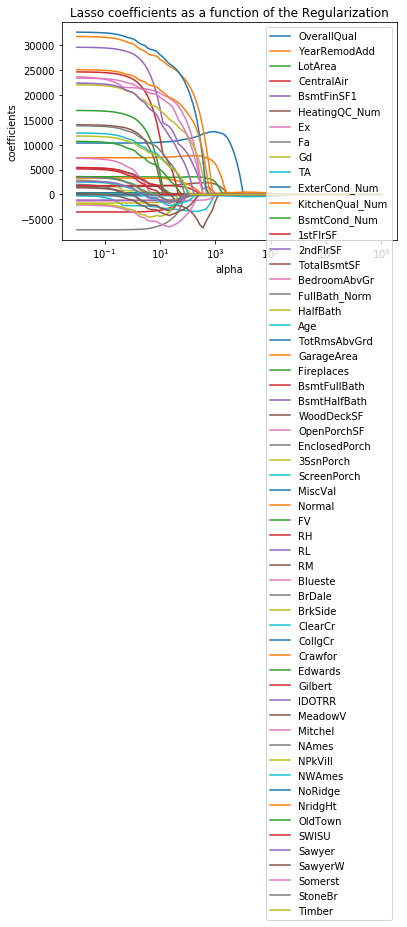

In [17]:
alphas_lasso = np.logspace(-2, 9, 100)
coef_lasso = []
for i in alphas_lasso:
    lasso.set_params(alpha = i).fit(x, y)
    coef_lasso.append(lasso.coef_)

columns = ['OverallQual', 'YearRemodAdd', 'LotArea', 'CentralAir', 'BsmtFinSF1', 'HeatingQC_Num', 'Ex', 'Fa', 'Gd', 'TA', 'ExterCond_Num', 'KitchenQual_Num', 'BsmtCond_Num', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'BedroomAbvGr', 'FullBath_Norm', 'HalfBath', 'Age', 'TotRmsAbvGrd', 'GarageArea', 'Fireplaces', 'BsmtFullBath', 'BsmtHalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'Normal', 'FV', 'RH', 'RL', 'RM', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber']
df_coef = pd.DataFrame(coef_lasso, index=alphas_lasso, columns=columns)
title = 'Lasso coefficients as a function of the Regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.figure(figsize=(20,10))
plt.show()

In [18]:
#Compare Ridge vs. Lasso
print("The determination of ridge regression is: %.4f" %ridge.score(x, y))
print("The determination of lasso regression is: %.4f" %lasso.score(x, y))

The determination of ridge regression is: 0.8940
The determination of lasso regression is: 0.0000


In [19]:
#Ridge Regression tested 10000 times

scoredata = []
RidgeModelScore = np.array(scoredata, dtype = np.float32)
for l in range(10000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    ridge = linear_model.Ridge(alpha = 10) # create a ridge regression instance
    ridge.fit(x, y)
    model = ridge.fit(X_train, y_train)
    predictions = ridge.predict(X_test)
    temp1 = model.score(X_test, y_test)
    RidgeModelScore = np.append(RidgeModelScore, temp1)

In [20]:
np.mean(RidgeModelScore)

0.8793134020736386

In [21]:
#Lasso Regression tested 10000 times

scoredata = []
LassoModelScore = np.array(scoredata, dtype = np.float32)
for l in range(10000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    lasso = linear_model.Lasso(alpha = 10) # create a ridge regression instance
    lasso.fit(x, y)
    model = lasso.fit(X_train, y_train)
    predictions = lasso.predict(X_test)
    temp1 = model.score(X_test, y_test)
    LassoModelScore = np.append(LassoModelScore, temp1)

In [22]:
np.mean(LassoModelScore)

0.8794277019350882

In [23]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(model, x, y, cv=10)
print('Cross-validated scores:', scores)

Cross-validated scores: [0.8934222  0.7625589  0.59983716 0.77199933 0.90977176 0.87640597
 0.68508175 0.86791087 0.85594327 0.80611688]


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Text(0.5,1,'Model Predictions vs. Actual Sale Price')

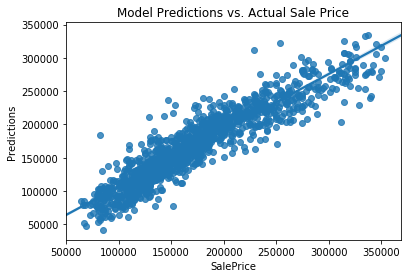

In [24]:
predictions = cross_val_predict(model, x, y, cv=10)
sns.regplot(y, predictions)
plt.xlabel("SalePrice")
plt.ylabel("Predictions")
plt.title('Model Predictions vs. Actual Sale Price')

In [25]:
accuracy = metrics.r2_score(y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.8497645309681421


In [26]:
#EDA

AxesSubplot(0.125,0.125;0.775x0.755)


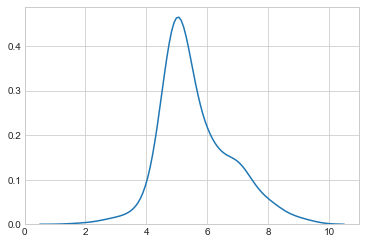

In [27]:
sns.set_style('whitegrid')
print(sns.kdeplot(np.array(training['OverallCond']), bw=0.5))

training['LowQualFinSF'].value_counts()

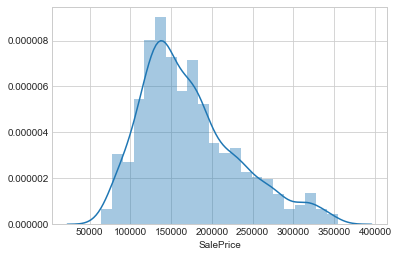

In [28]:
sns.distplot(training['SalePrice'])

In [29]:
print(training['SalePrice'].skew())
print(training['SalePrice'].kurt())

0.8076714201454085
0.20314982136917203


SalePrice            1.000000
TotalSF              0.794514
OverallQual_Stand    0.786542
OverallQual          0.786542
OverallQual_Norm     0.786542
GrLivArea            0.695799
ExterQual_Num        0.660595
Condition_Avg        0.646103
Condition_Sum        0.646103
KitchenQual_Num      0.632418
GarageCars           0.625650
Condition_W_Avg      0.623237
GarageArea           0.611784
FullBath_Norm        0.592873
FullBath             0.592873
FullBath_Stand       0.592873
Gd                   0.585600
TotalBsmtSF          0.576552
YearBuilt            0.555399
1stFlrSF             0.537239
YearRemodAdd         0.527629
GarageYrBlt          0.502996
TotRmsAbvGrd         0.485003
Fireplaces           0.447507
HeatingQC_Num        0.436050
MasVnrArea           0.377647
LotFrontage          0.360012
OpenPorchSF          0.349864
2ndFlrSF             0.334018
NridgHt              0.322813
                       ...   
ExterCond_Num       -0.003285
MiscVal             -0.005633
Id        

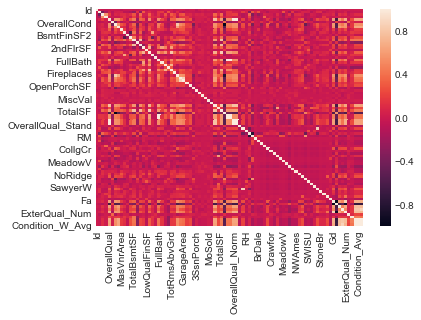

In [30]:
corr_matrix = training.corr()
print(corr_matrix['SalePrice'].sort_values(ascending = False))
sns.heatmap(training.corr())

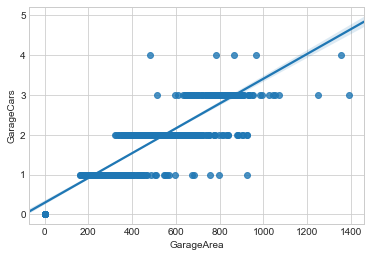

In [31]:
sns.regplot(training['GarageArea'], training['GarageCars'])

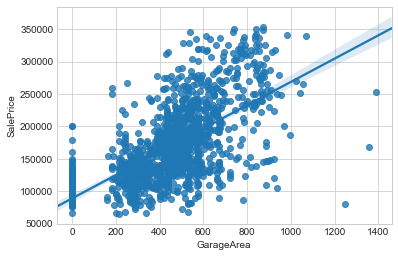

In [32]:
sns.regplot(training['GarageArea'], training['SalePrice'])

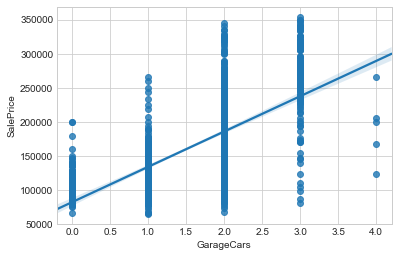

In [33]:
sns.regplot(training['GarageCars'], training['SalePrice'])

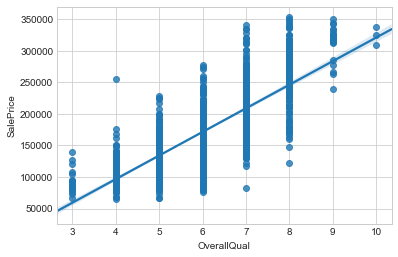

In [34]:
sns.regplot(training['OverallQual'], training['SalePrice'])

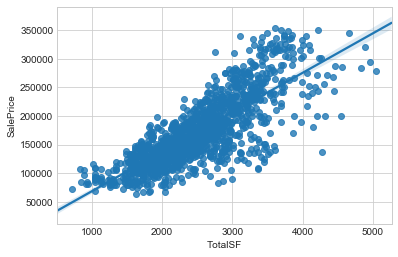

In [35]:
sns.regplot(training['TotalSF'], training['SalePrice'])

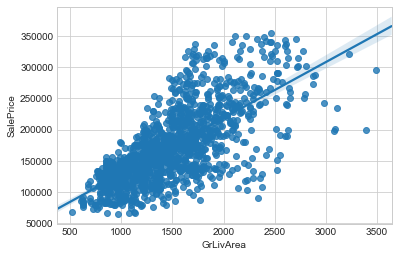

In [36]:
sns.regplot(training['GrLivArea'], training['SalePrice'])

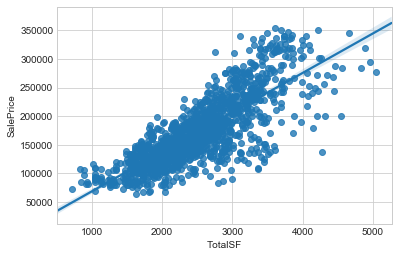

In [37]:
sns.regplot(training['TotalSF'], training['SalePrice'])

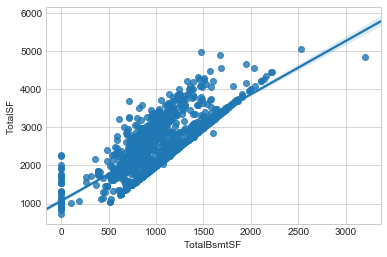

In [38]:
sns.regplot(training['TotalBsmtSF'], training['TotalSF'])

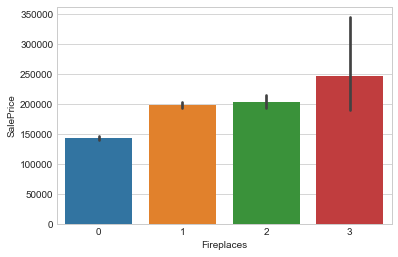

In [39]:
sns.barplot(training['Fireplaces'], training['SalePrice'])

In [40]:
training['BedroomAbvGr'].value_counts()

3    775
2    336
4    195
1     39
5     21
6      7
8      1
Name: BedroomAbvGr, dtype: int64

In [41]:
total = training.isnull().sum().sort_values(ascending=False)
percent = 100 * (training.isnull().sum()/training.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total    Percent
PoolQC         1369  99.636099
MiscFeature    1323  96.288210
Alley          1286  93.595342
Fence          1103  80.276565
FireplaceQu     672  48.908297
LotFrontage     249  18.122271
GarageQual       72   5.240175
GarageYrBlt      72   5.240175
GarageCond       72   5.240175
GarageType       72   5.240175
GarageFinish     72   5.240175
BsmtExposure     36   2.620087
BsmtFinType2     36   2.620087
BsmtFinType1     35   2.547307
BsmtCond         35   2.547307
BsmtQual         35   2.547307
MasVnrArea        7   0.509461
MasVnrType        7   0.509461
Electrical        1   0.072780
BsmtHalfBath      0   0.000000

In [42]:
training['MiscFeature'].value_counts()

Shed    47
Gar2     2
TenC     1
Othr     1
Name: MiscFeature, dtype: int64

In [43]:
training[training['MiscFeature'] == 'TenC']

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
444  1387          60       RL         80.0    16692   Pave   NaN      IR1   

    LandContour Utilities       ...        Gd TA KitchenQual_Num  \
444         Lvl    AllPub       ...         0  1             4.0   

    HeatingQC_Num ExterQual_Num ExterCond_Num BsmtCond_Num  Condition_Sum  \
444           3.0           3.0           3.0          3.0           16.0   

     Condition_Avg  Condition_W_Avg  
444            3.2             3.22  

[1 rows x 128 columns]

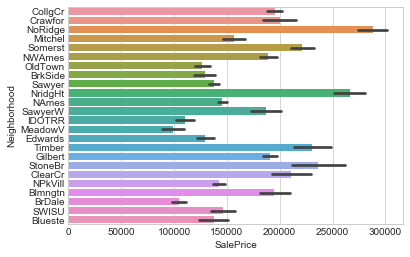

In [44]:
sns.barplot(training['SalePrice'], training['Neighborhood'])

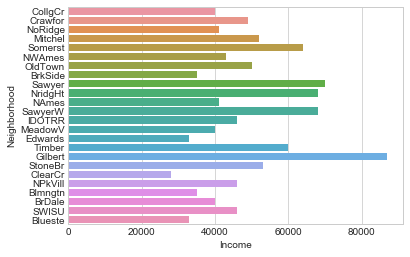

In [45]:
sns.barplot(training['Income'], training['Neighborhood'])

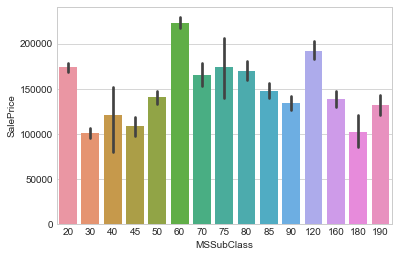

In [46]:
sns.barplot(training['MSSubClass'], training['SalePrice'])

RL         1077
RM          211
FV           64
RH           16
C (all)       6
Name: MSZoning, dtype: int64


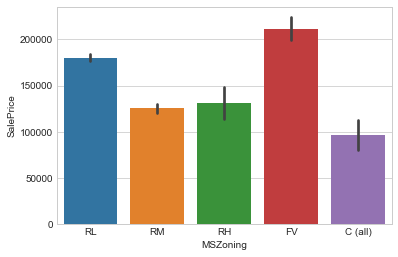

In [47]:
sns.barplot(training['MSZoning'], training['SalePrice'])
print(training['MSZoning'].value_counts())

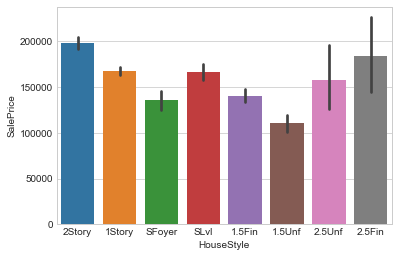

In [48]:
sns.barplot(training['HouseStyle'], training['SalePrice'])

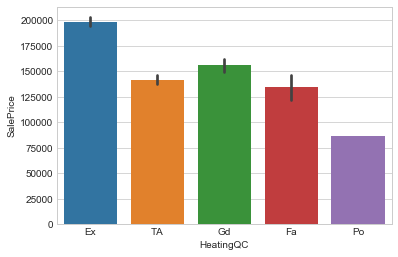

In [49]:
sns.barplot(training['HeatingQC'], training['SalePrice'])

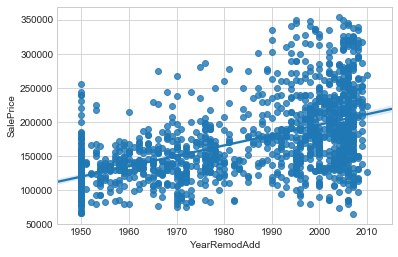

In [50]:
sns.regplot(training['YearRemodAdd'], training['SalePrice'])

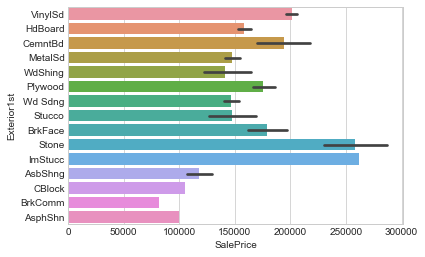

In [51]:
sns.barplot(training['SalePrice'], training['Exterior1st'])

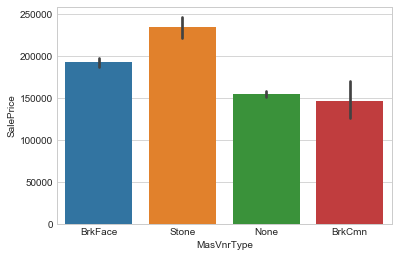

In [52]:
sns.barplot(training['MasVnrType'], training['SalePrice'])

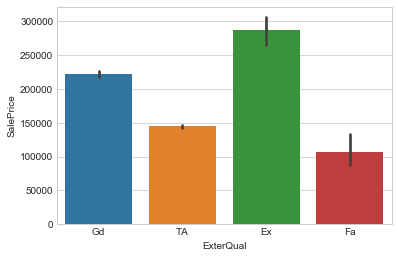

In [53]:
sns.barplot(training['ExterQual'], training['SalePrice'])

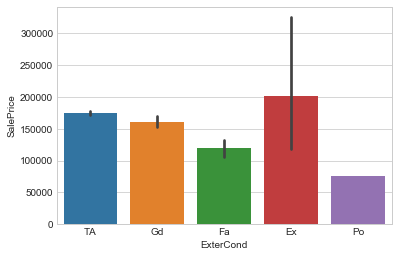

In [54]:
sns.barplot(training['ExterCond'], training['SalePrice'])

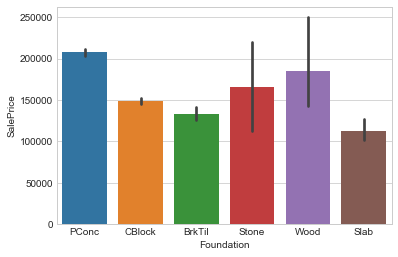

In [55]:
sns.barplot(training['Foundation'], training['SalePrice'])

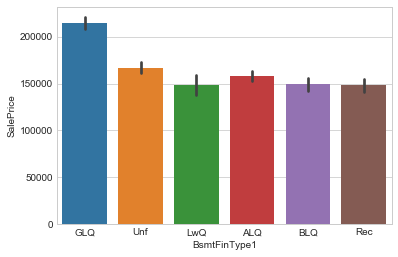

In [56]:
sns.barplot(training['BsmtFinType1'], training['SalePrice'])

SBrkr    1258
FuseA      87
FuseF      24
FuseP       3
Mix         1
Name: Electrical, dtype: int64

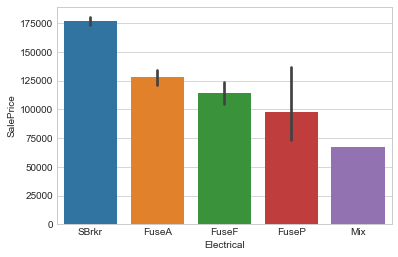

In [57]:
sns.barplot(training['Electrical'], training['SalePrice'])
training['Electrical'].value_counts()

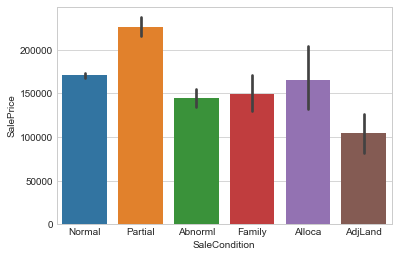

In [58]:
sns.barplot(training['SaleCondition'], training['SalePrice'])

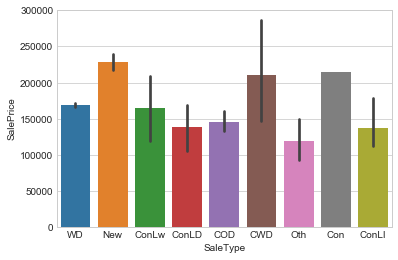

In [59]:
sns.barplot(training['SaleType'], training['SalePrice'])

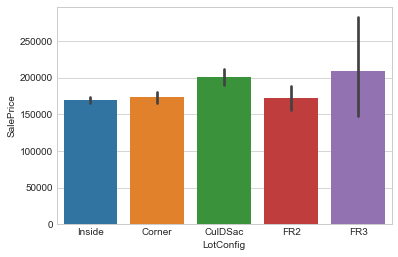

In [60]:
sns.barplot(training['LotConfig'], training['SalePrice'])

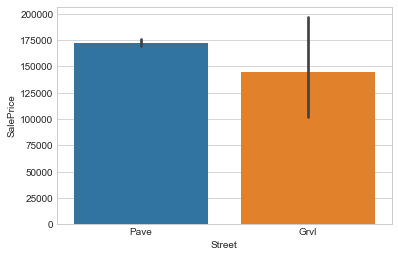

In [61]:
sns.barplot(training['Street'], training['SalePrice'])

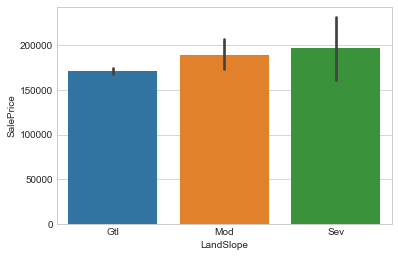

In [62]:
sns.barplot(training['LandSlope'], training['SalePrice'])

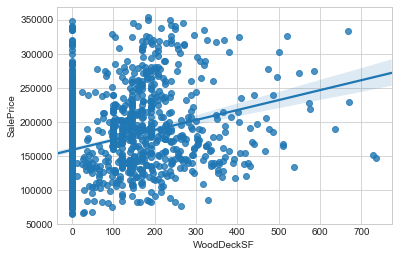

In [63]:
sns.regplot(training['WoodDeckSF'], training['SalePrice'])

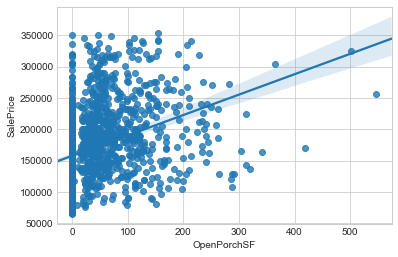

In [64]:
sns.regplot(training['OpenPorchSF'], training['SalePrice'])

In [65]:
training[training['Neighborhood'] == 'NridgHt'].describe()

Id  MSSubClass  LotFrontage       LotArea  OverallQual  \
count    54.000000   54.000000    53.000000     54.000000    54.000000   
mean    603.092593   72.222222    75.811321   9747.685185     7.888889   
std     421.641280   46.689123    25.763015   3554.132518     0.861475   
min      12.000000   20.000000    34.000000   2268.000000     6.000000   
25%     292.500000   20.000000    59.000000   7117.250000     7.000000   
50%     561.500000   60.000000    80.000000  10593.500000     8.000000   
75%     989.250000  120.000000    96.000000  12071.250000     8.000000   
max    1360.000000  160.000000   129.000000  16737.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd  MasVnrArea   BsmtFinSF1  \
count         54.0    54.000000     54.000000   54.000000    54.000000   
mean           5.0  2005.296296   2005.759259  262.740741   531.407407   
std            0.0     1.585663      1.528783  145.972366   531.701275   
min            5.0  2003.000000   2003.000000   42.000000     0.000000   
25%            5.0  2004.000000   2005.000000  163.750000     0.000000   
50%            5.0  2005.000000   2006.000000  249.000000   556.500000   
75%            5.0  2006.000000   2007.000000  337.000000  1002.500000   
max            5.0  2009.000000   2010.000000  788.000000  1572.000000   

            ...                Gd         TA  KitchenQual_Num  HeatingQC_Num  \
count       ...         54.000000  54.000000        54.000000      54.000000   
mean        ...          0.777778   0.018519         4.351852       4.981481   
std         ...          0.419643   0.136083         0.482032       0.136083   
min         ...          0.000000   0.000000         4.000000       4.000000   
25%         ...          1.000000   0.000000         4.000000       5.000000   
50%         ...          1.000000   0.000000         4.000000       5.000000   
75%         ...          1.000000   0.000000         5.000000       5.000000   
max         ...          1.000000   1.000000         5.000000       5.000000   

       ExterQual_Num  ExterCond_Num  BsmtCond_Num  Condition_Sum  \
count      54.000000           54.0     54.000000      54.000000   
mean        4.185185            3.0      3.074074      19.592593   
std         0.437578            0.0      0.264351       0.765248   
min         3.000000            3.0      3.000000      19.000000   
25%         4.000000            3.0      3.000000      19.000000   
50%         4.000000            3.0      3.000000      19.000000   
75%         4.000000            3.0      3.000000      20.000000   
max         5.000000            3.0      4.000000      21.000000   

       Condition_Avg  Condition_W_Avg  
count      54.000000        54.000000  
mean        3.918519         4.012407  
std         0.153050         0.142232  
min         3.800000         3.850000  
25%         3.800000         3.900000  
50%         3.800000         3.900000  
75%         4.000000         4.120000  
max         4.200000         4.260000  

[8 rows x 86 columns]

In [66]:
training[training['YearBuilt'] >= 2000].describe() - training[training['YearBuilt'] < 2000].describe()

Id  MSSubClass  LotFrontage       LotArea  OverallQual  \
count -686.000000 -686.000000  -525.000000    -686.00000  -686.000000   
mean    14.477422    4.721241     2.636364   -1243.83997     1.590850   
std     13.284666    1.688938     0.602873   -5662.97048    -0.161802   
min     -3.000000    0.000000     3.000000     817.00000     1.000000   
25%    -14.750000    0.000000     2.000000    -117.00000     2.000000   
50%     21.000000   10.000000     2.000000    -144.00000     1.000000   
75%     16.500000  -10.000000     5.000000     -24.50000     2.000000   
max     -5.000000  -10.000000  -131.000000 -141403.00000     0.000000   

       OverallCond   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
count  -686.000000 -686.000000   -686.000000 -691.000000 -686.000000   
mean     -0.783523   45.415478     27.288615   39.153826  -44.070467   
std      -1.083475  -23.806134    -17.011344  -12.142913   85.920603   
min       3.000000  128.000000     50.000000    0.000000    0.000000   
25%       0.000000   61.750000     43.750000    0.000000    0.000000   
50%      -1.000000   43.000000     28.000000   75.000000 -371.500000   
75%      -2.000000   29.000000     11.000000   82.000000   52.000000   
max      -3.000000   10.000000      0.000000 -812.000000 -307.000000   

            ...                 Gd          TA  KitchenQual_Num  \
count       ...        -686.000000 -686.000000      -686.000000   
mean        ...           0.686707   -0.721562         0.781435   
std         ...          -0.004520   -0.072560        -0.122443   
min         ...           0.000000    0.000000         1.000000   
25%         ...           1.000000   -1.000000         1.000000   
50%         ...           1.000000   -1.000000         1.000000   
75%         ...           1.000000   -1.000000         0.000000   
max         ...           0.000000    0.000000         0.000000   

       HeatingQC_Num  ExterQual_Num  ExterCond_Num  BsmtCond_Num  \
count    -686.000000    -686.000000    -686.000000   -686.000000   
mean        1.112689       0.782632      -0.118447      0.158145   
std        -0.762607      -0.017189      -0.396228     -0.309864   
min         3.000000       1.000000       2.000000      0.000000   
25%         2.000000       1.000000       0.000000      0.000000   
50%         1.000000       1.000000       0.000000      0.000000   
75%         0.000000       1.000000       0.000000      0.000000   
max         0.000000       0.000000      -2.000000      0.000000   

       Condition_Sum  Condition_Avg  Condition_W_Avg  
count    -686.000000    -686.000000      -686.000000  
mean        2.716454       0.543291         0.590637  
std        -0.948376      -0.189675        -0.235853  
min         6.000000       1.200000         1.330000  
25%         4.000000       0.800000         0.900000  
50%         3.000000       0.600000         0.630000  
75%         2.000000       0.400000         0.360000  
max         0.000000       0.000000         0.040000  

[8 rows x 86 columns]

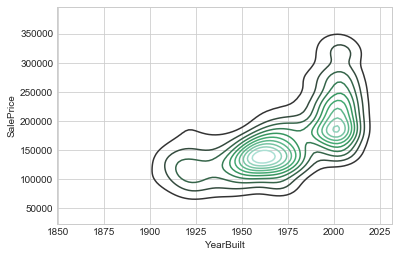

In [67]:
sns.kdeplot(training['YearBuilt'], training['SalePrice'])

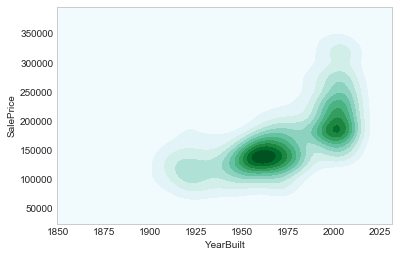

In [68]:
sns.kdeplot(training['YearBuilt'], training['SalePrice'], shade = True)

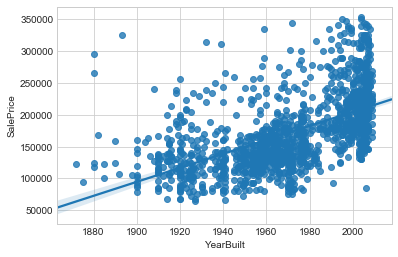

In [69]:
sns.regplot(training['YearBuilt'], training['SalePrice'])

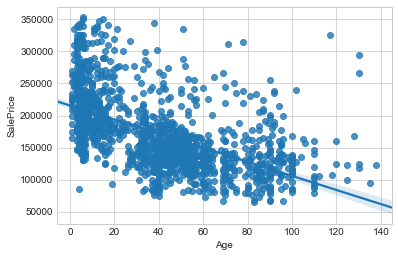

In [70]:
sns.regplot(training['Age'], training['SalePrice'])

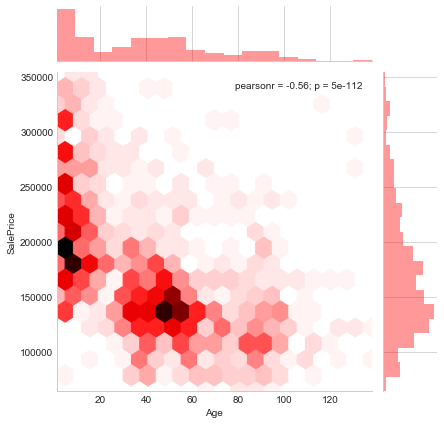

In [71]:
sns.jointplot(training['Age'], training['SalePrice'], kind='hex', color = 'r')

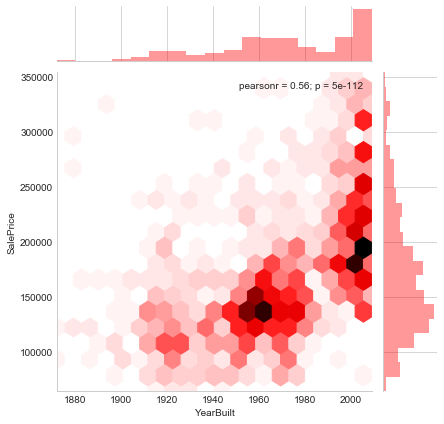

In [72]:
sns.jointplot(training['YearBuilt'], training['SalePrice'], kind='hex', color = 'r')

In [73]:
##Test Data
test = pd.read_csv("test.csv")

In [74]:
#Add important variables
test['TotalSF'] = (test['1stFlrSF'] + test['2ndFlrSF'] + test['TotalBsmtSF'])
test['Age'] = 2010 - test['YearBuilt']

In [75]:
#Turning Central Air to Numeric
CentralAir = test['CentralAir']
CentralAir_cat_encoded, CentralAir_Categories = CentralAir.factorize()
CentralAir_Num = pd.DataFrame(CentralAir_cat_encoded)
test['CentralAir'] =  CentralAir_Num

In [76]:
#Normalizing and Standardizing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.MinMaxScaler()
test['FullBath_Norm'] = scaler.fit_transform(test[["FullBath"]])
scaler = preprocessing.StandardScaler()
test['FullBath_Stand'] = scaler.fit_transform(test[["FullBath"]])

scaler = preprocessing.MinMaxScaler()
test['OverallQual_Norm'] = scaler.fit_transform(test[["OverallQual"]])
scaler = preprocessing.StandardScaler()
test['OverallQual_Stand'] = scaler.fit_transform(test[["OverallQual"]])

In [77]:
#Making dummy variables
#Sale Condition
test2 = test.copy()
SaleCondition_dummy = pd.get_dummies(test2['SaleCondition'])
SaleCondition_dummy = SaleCondition_dummy.drop(["Abnorml", "AdjLand", "Alloca", "Family", "Partial"], 1)
test2 = pd.concat([test2, SaleCondition_dummy], 1)
test = test2.copy()

#MSZoning
test3 = test.copy()
MSZoning_dummy = pd.get_dummies(test3['MSZoning'])
MSZoning_dummy = MSZoning_dummy.drop(["C (all)"], 1)
test3 = pd.concat([test3, MSZoning_dummy], 1)
test = test3.copy()

#Neighborhood
test4 = test.copy()
Neighborhood_dummy = pd.get_dummies(test4['Neighborhood'])
Neighborhood_dummy = Neighborhood_dummy.drop(["Blmngtn"], 1)
test4 = pd.concat([test4, Neighborhood_dummy], 1)
test = test4.copy()

#Exterior Quality
test5 = test.copy()
ExterQual_dummy = pd.get_dummies(test5['ExterQual'])
#Neighborhood_dummy = Neighborhood_dummy.drop([""], 1)
test5 = pd.concat([test5, ExterQual_dummy], 1)
test = test5.copy()

conv_dict={'Ex':5., 'Gd':4., 'TA':3., 'Fa':2., 'Po':1.}
test['KitchenQual_Num'] = (test['KitchenQual']).apply(conv_dict.get)
test['KitchenQual_Num'] = pd.to_numeric(test['KitchenQual_Num'])

conv_dict={'Ex':5., 'Gd':4., 'TA':3., 'Fa':2., 'Po':1.}
test['HeatingQC_Num'] = test['HeatingQC'].apply(conv_dict.get)
test['HeatingQC_Num'] = pd.to_numeric(test['HeatingQC_Num'])

conv_dict={'Ex':5., 'Gd':4., 'TA':3., 'Fa':2., 'Po':1., ' ':0}
test['ExterQual_Num'] = (test['ExterQual']).apply(conv_dict.get)

conv_dict={'Ex':5., 'Gd':4., 'TA':3., 'Fa':2., 'Po':1., ' ':0}
test['ExterCond_Num'] = (test['ExterCond']).apply(conv_dict.get)

conv_dict={'Ex':5., 'Gd':4., 'TA':3., 'Fa':2., 'Po':1., ' ':0}
test['BsmtCond_Num'] = (test['BsmtCond']).apply(conv_dict.get)

In [78]:
test['KitchenQual_Num'] = test['KitchenQual_Num'].fillna(3)
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(0)
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(1)
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(0)
test['BsmtCond_Num'] = test['BsmtCond_Num'].fillna(0)

In [79]:
## determination
print("The determination of lasso regression is: %.4f" %lasso.score(x, y))

The determination of lasso regression is: 0.8929


In [80]:
test['GarageArea'] = test['GarageArea'].fillna(0)
test['TotalSF'] = test['TotalSF'].fillna(test['GrLivArea'])

In [81]:
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(0)

In [82]:
## prediction
y_predict = lasso.predict(test[['OverallQual', 'YearRemodAdd', 'LotArea', 'CentralAir', 'BsmtFinSF1', 'HeatingQC_Num', 'Ex', 'Fa', 'Gd', 'TA', 'ExterCond_Num', 'KitchenQual_Num', 'BsmtCond_Num', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'BedroomAbvGr', 'FullBath_Norm', 'HalfBath', 'Age', 'TotRmsAbvGrd', 'GarageArea', 'Fireplaces', 'BsmtFullBath', 'BsmtHalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'Normal', 'FV', 'RH', 'RL', 'RM', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber']])

In [83]:
y_predict

array([117745.0103283 , 169868.02987819, 182728.56862089, ...,
       165899.7723179 , 112021.88973141, 214063.46472536])

In [84]:
finalPredictions = pd.DataFrame({'Id':test['Id'], 'SalePrice':y_predict})

In [85]:
finalPredictions.to_csv('ALPSsubmit.csv', index = False)